<a href="https://colab.research.google.com/github/MeghaUkkali9/Advanced-Machine-Learing/blob/master/Project4_MeghaUkkali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project#: 1
Name: Megha Ukkali
Course: Advanced Machine Learning
Submission Date: 01/29/2020

Project 1
3) Download the Wine data set from https://archive.ics.uci.edu/ml/datasets/Wine (Links to an external site.) and create a new Jupytor notebook to perform the following tasks:
a) --Plot the classification data against each of the attributes

b) -- Which attribute has the highest correlation with the classification  label?

c) -- Repeat all the experiments in 02_end_to_end_machine_learning_project.ipynb but use the Wine data set instead the housing data

Upload the wine dataset from the git hub

In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [0]:
import os
import urllib


DOWNLOAD_ROOT = "https://raw.githubusercontent.com/MeghaUkkali9/Advanced-Machine-Learing/master/"
PRSA_PATH = os.path.join("datasets", "PRSA")
PRSA_URL = DOWNLOAD_ROOT + "datasets/PRSA/PRSA_data_2010.1.1-2014.12.31.csv"

def fetch_prsadata_data(prsadata_url=PRSA_URL, prsadata_path=PRSA_PATH):
    if not os.path.isdir(prsadata_path):
        os.makedirs(prsadata_path)
    tgz_path = os.path.join(prsadata_path, "PRSA_data_2010.1.1-2014.12.31.csv")
    urllib.request.urlretrieve(prsadata_url, tgz_path)

In [0]:
fetch_prsadata_data()

# Import Dataset

Load the .csv file of prsa dataset

In [0]:
import pandas as pd

def load_prsadata_data(prsadata_path=PRSA_PATH):
    csv_path = os.path.join(prsadata_path, "PRSA_data_2010.1.1-2014.12.31.csv")
    return pd.read_csv(csv_path)

# Explore Dataset

In [5]:
prsadata = load_prsadata_data()
prsadata.head(10)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
5,6,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
6,7,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
7,8,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
8,9,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0
9,10,2010,1,1,9,NaN,-20,-8.0,1017.0,NW,27.28,0,0


In [6]:
prsadata.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

In [7]:
prsadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
No       43824 non-null int64
year     43824 non-null int64
month    43824 non-null int64
day      43824 non-null int64
hour     43824 non-null int64
pm2.5    41757 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null object
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [8]:
prsadata.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


Dropping the number feature. This is not neccessary for predicting PM2.5.

In [0]:
prsadata=prsadata.drop("No", axis=1)

# PLOT THE CLASSIFICATION DATA FOR EACH ATTRIBUTE

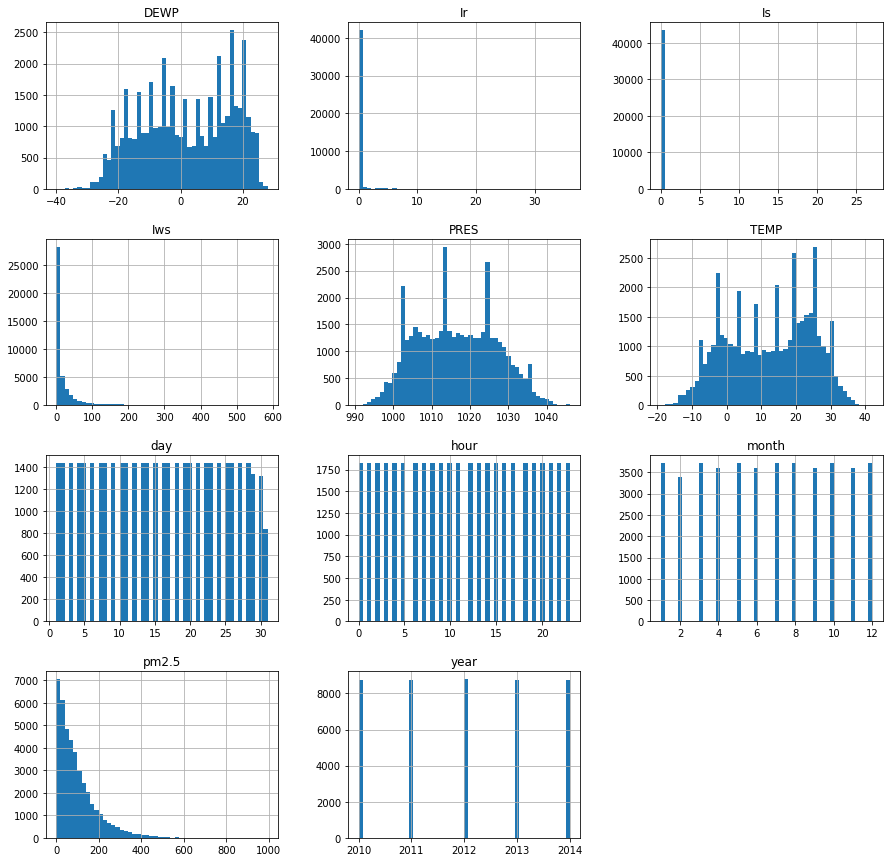

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
prsadata.hist(bins=50, figsize=(15,15))
plt.show()

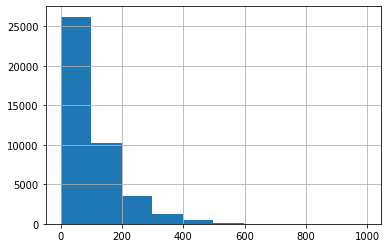

In [11]:
prsadata["pm2.5"].hist()


In [12]:
prsadata["cbwd"].value_counts()

SE    15290
NW    14150
cv     9387
NE     4997
Name: cbwd, dtype: int64

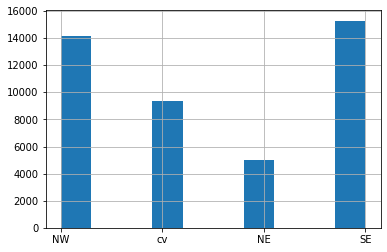

In [13]:
prsadata["cbwd"].hist()

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
prsadata['cbwd'] = encoder.fit_transform(prsadata['cbwd'].astype('str')) 
prsadata.head()


,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,NaN,-21,-11.0,1021.0,1,1.79,0,0
1,2010,1,1,1,NaN,-21,-12.0,1020.0,1,4.92,0,0
2,2010,1,1,2,NaN,-21,-11.0,1019.0,1,6.71,0,0
3,2010,1,1,3,NaN,-21,-14.0,1019.0,1,9.84,0,0
4,2010,1,1,4,NaN,-20,-12.0,1018.0,1,12.97,0,0


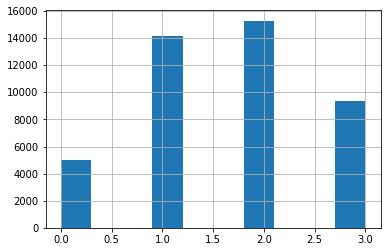

In [15]:
prsadata["cbwd"].hist()

#Data Scrubbing

In [0]:
median = prsadata["pm2.5"].median()
prsadata["pm2.5"].fillna(median, inplace=True) 

In [23]:
prsadata.describe()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,2012.000000,6.523549,15.727820,11.500000,97.357977,1.817246,12.448521,1016.447654,1.663267,23.889140,0.052734,0.194916
std,1.413842,3.448572,8.799425,6.922266,90.030249,14.433440,12.198613,10.268698,0.937981,50.010635,0.760375,1.415867
min,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.000000,0.450000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,31.000000,-10.000000,2.000000,1008.000000,1.000000,1.790000,0.000000,0.000000
50%,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,2.000000,5.370000,0.000000,0.000000
75%,2013.000000,10.000000,23.000000,17.250000,132.000000,15.000000,23.000000,1025.000000,2.000000,21.910000,0.000000,0.000000
max,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,3.000000,585.600000,27.000000,36.000000


In [24]:
prsadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 12 columns):
year     43824 non-null int64
month    43824 non-null int64
day      43824 non-null int64
hour     43824 non-null int64
pm2.5    43824 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null int64
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(4), int64(8)
memory usage: 4.0 MB


In [25]:
prsadata.isnull().sum()

year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64

In [26]:
prsadata.isnull().values.any()

False

In [27]:
prsadata[prsadata["pm2.5"].isnull()]

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir


In [29]:
prsadata.shape

(43824, 12)

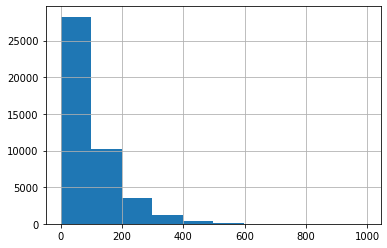

In [28]:
prsadata["pm2.5"].hist()

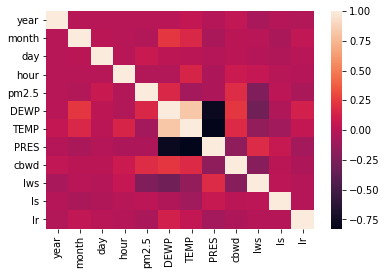

In [30]:
import seaborn as sns
corr = prsadata.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# VISUALIZING FEATURE

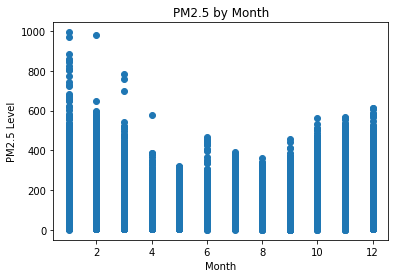

In [31]:
x = prsadata['month']
y = prsadata['pm2.5']
plt.scatter(x,y)
plt.xlabel('Month')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Month')
plt.show()

When plotting the PM2.5 concentration by month you can clearly see that winter months have a much larger variation in pollution levels, including some very high levels.

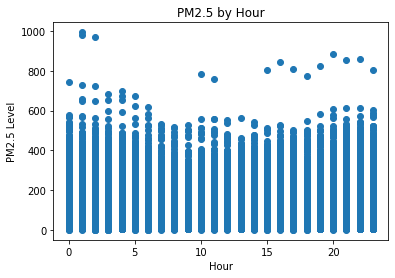

In [32]:
x = prsadata['hour']
y = prsadata['pm2.5']
plt.scatter(x,y)
plt.xlabel('Hour')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Hour')
plt.show()

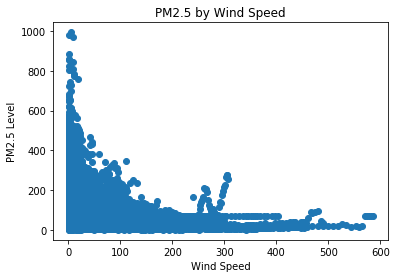

In [33]:
x = prsadata['Iws']
y = prsadata['pm2.5']
plt.scatter(x,y)
plt.xlabel('Wind Speed')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Wind Speed')
plt.show()

There is drop in the PM2.5 levels at higher snow. I think snow may be a good feature to predict PM2.5



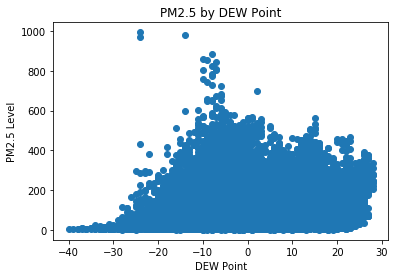

In [34]:
x = prsadata['DEWP']
y = prsadata['pm2.5']
plt.scatter(x,y)
plt.xlabel('DEW Point')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by DEW Point')
plt.show()

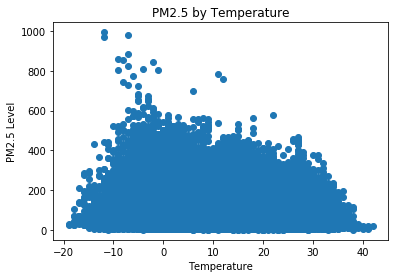

In [35]:
x = prsadata['TEMP']
y = prsadata['pm2.5']
plt.scatter(x,y)
plt.xlabel('Temperature')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Temperature')
plt.show()

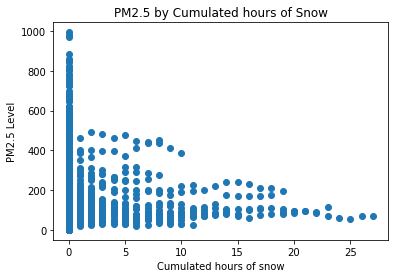

In [36]:
x = prsadata['Is']
y = prsadata['pm2.5']
plt.scatter(x,y)
plt.xlabel('Cumulated hours of snow')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Cumulated hours of Snow')
plt.show()

There is drop in the PM2.5 levels at higher snow. I think snow may be a good feature.

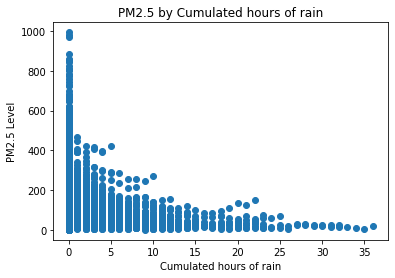

In [37]:
x = prsadata['Ir']
y = prsadata['pm2.5']
plt.scatter(x,y)
plt.xlabel('Cumulated hours of rain')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Cumulated hours of rain')
plt.show()

There is drop in the PM2.5 levels at higher rain. It seems rain may be a good feature.

There are spikes which are seen at all times of day that have a high variance. This does not seem predictive.
Winter months are a large predictor for PM2.5level. Month is also a good predictor.
It is clear that at higher windspeed,rain,and snow lower the PM2.5 level. Wind speed,rain and snow are a good predictor.




# Split dataset

In [0]:
# to make this notebook's output identical at every run
import numpy as np

np.random.seed(42)

In [0]:
X = prsadata.drop("pm2.5", axis=1) 
y = prsadata["pm2.5"].copy()

In [41]:
X.columns

Index(['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws',
       'Is', 'Ir'],
      dtype='object')

In [42]:
X.shape

(43824, 11)

In [43]:
y.shape

(43824,)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
len(X_train)

35059

In [46]:
len(X_test)

8765

In [47]:
X_train.head()

,year,month,day,hour,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
6670,2010,10,5,22,13,16.0,1013.0,2,1.79,0,0
23445,2012,9,3,21,8,16.0,1015.0,1,66.15,0,0
24928,2012,11,4,16,0,4.0,1013.0,1,200.74,0,31
1588,2010,3,8,4,-5,-4.0,1038.0,2,10.29,3,0
9737,2011,2,10,17,-4,-3.0,1027.0,2,87.19,19,0


**Prepare the data for Machine Learning algorithms**

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [49]:
X_train_reduced.shape

(35059, 3)

In [0]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [140]:
d

3

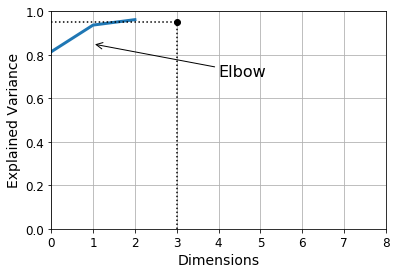

In [141]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 8, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(1, 0.85), xytext=(4, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)

plt.show()

In [142]:
np.sum(pca.explained_variance_ratio_)

0.9618904263828616

#Linear Regression

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
regressor = LinearRegression()
# Train the model using the training sets
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
regressor.intercept_, regressor.coef_

(97.312874,
 array([  1.350833 ,  -4.9312954,   5.984777 ,   9.97661  ,  63.12402  ,
        -76.04509  , -14.687136 ,  10.346989 , -10.513228 ,  -2.2126834,
         -9.217285 ], dtype=float32))

In [0]:
# Make predictions using the testing set
lin_pred = regressor.predict(X_test)

In [54]:
linear_regression_score = regressor.score(X_test, y_test)
linear_regression_score

0.2545974516973225

After applying scaling to Linear

In [55]:
regressor.fit(X_train_scaled, y_train)
lin_pred_sc=regressor.predict(X_test)
regressor.score(X_test, y_test)

-21607.325568550124

In [56]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_test, lin_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

77.07947712845619

In [57]:
print("Root Mean Squared Error(RMSE) : ", lin_rmse)
print("Mean Absolute Error(MAE) : ", mean_absolute_error(y_test, lin_pred))
print("Mean Squred Error(MSE) : ", mean_squared_error(y_test, lin_pred))
print("R-squared:", r2_score(y_test, lin_pred))

Root Mean Squared Error(RMSE) :  77.07947712845619
Mean Absolute Error(MAE) :  56.048105361124634
Mean Squred Error(MSE) :  5941.245794396202
R-squared: 0.2545974516973225


In [58]:
import pandas as pd

coef = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coef

,Coefficient
year,1.350833
month,-4.931295
day,5.984777
hour,9.976610
DEWP,63.124020
TEMP,-76.045090
PRES,-14.687136
cbwd,10.346989
Iws,-10.513228
Is,-2.212683


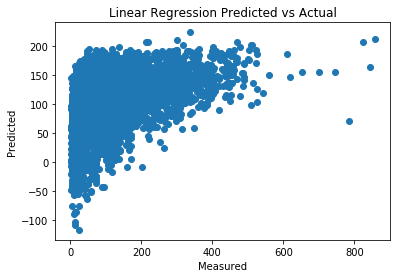

In [59]:
plt.scatter(y_test, lin_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

In [97]:
plot_learning_curves(regressor, X_train, y_train)
plt.axis([0, 80, 0, 3])                         # not shown in the book
save_fig("underfitting_learning_curves_plot")   # not shown
plt.show() 

NameError: ignored

# Lasso Regression

In [63]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [65]:
lasso_score = lasso_reg.score(X_test, y_test)
lasso_score

0.25467760417582863

In [0]:
# Make predictions using the testing set
lasso_pred = lasso_reg.predict(X_test)

In [67]:
mse_lasso = mean_squared_error(y_test, lasso_pred)
rmse_lasso = np.sqrt(mse_lasso)

print("Root Mean Squared Error:",rmse_lasso)
print("Mean Absolute Error:", mean_absolute_error(y_test, lasso_pred))

Root Mean Squared Error: 77.07533287295391
Mean Absolute Error: 56.04520017117027


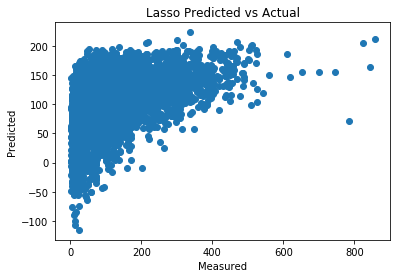

In [68]:
plt.scatter(y_test, lasso_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Lasso Predicted vs Actual')
plt.show()

Applying scaling 

In [69]:
lasso_reg.fit(X_train_scaled, y_train)
lasso_reg_pred_sc=lasso_reg.predict(X_test)
lasso_reg.score(X_test, y_test)

-20949.320469068833

# Elastic Net Regression

In [70]:
from sklearn.linear_model import ElasticNet

elasticnet_reg = ElasticNet(alpha=0.1)
elasticnet_reg.fit(X_train, y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [71]:
elasticnet_score = elasticnet_reg.score(X_test, y_test)
elasticnet_score

0.2548335290863256

In [0]:
elasticnet_pred = elasticnet_reg.predict(X_test)

In [73]:
mse_elasticnet = mean_squared_error(y_test, elasticnet_pred)
rmse_elasticnet = np.sqrt(mse_elasticnet)

print("Root Mean Squared Error:", rmse_elasticnet)
print("Mean Absolute Error:", mean_absolute_error(y_test, elasticnet_pred))

Root Mean Squared Error: 77.06727019224934
Mean Absolute Error: 56.04287832582857


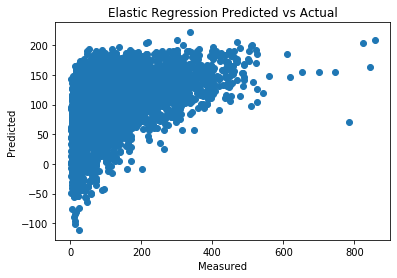

In [74]:
plt.scatter(y_test, elasticnet_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Elastic Regression Predicted vs Actual')
plt.show()

After Applying Scaling 

In [75]:
elasticnet_reg.fit(X_train_scaled, y_train)
elasticnet_reg_pred_sc=elasticnet_reg.predict(X_test)
elasticnet_reg.score(X_test, y_test)

-11847.675680895993

# Random Forest Regression

In [76]:
from sklearn.ensemble import RandomForestRegressor

rnd_clf = RandomForestRegressor(n_estimators=100, random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [77]:
rnd_clf_score = rnd_clf.score(X_test, y_test)
rnd_clf_score

0.8353029015260123

In [0]:
rnd_clf_pred = rnd_clf.predict(X_test)

In [79]:
mse_rnd = mean_squared_error(y_test, rnd_clf_pred)
rmse_rnd = np.sqrt(mse_rnd)

print("Root Mean Squared Error:",rmse_rnd)
print("Mean Absolute Error:", mean_absolute_error(y_test, rnd_clf_pred))
# variance score: 1 is perfect prediction
print("R-squared:", r2_score(y_test, rnd_clf_pred))

Root Mean Squared Error: 36.23149858523503
Mean Absolute Error: 22.337895037079292
R-squared: 0.8353029015260123


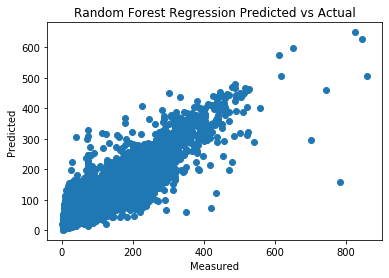

In [80]:
plt.scatter(y_test, rnd_clf_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Random Forest Regression Predicted vs Actual')
plt.show()

In [0]:
from sklearn.model_selection import cross_val_predict
y_train_pred_sc = cross_val_predict(rnd_clf, X_train, y_train, cv=3)

In [83]:
rnd_clf.fit(X_train_scaled, y_train)
rnd_clf_pred_sc=rnd_clf.predict(X_test)
rnd_clf.score(X_test, y_test)


-1.6141703588345648

In [86]:
from sklearn.model_selection import cross_val_score
scale_scores = cross_val_score(rnd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

ValueError: ignored

# Polynomial regression

In [0]:
import numpy as np

np.random.seed(42)

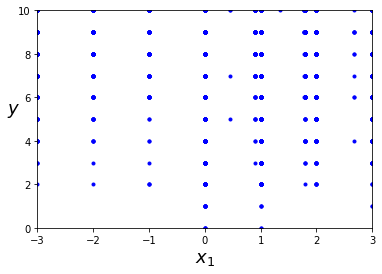

In [124]:
plt.plot(X_train, y_train, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [0]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [0]:
X_poly = poly_features.fit_transform(X_train)

In [155]:
X_poly[0]

array([2.010000e+03, 1.000000e+01, 5.000000e+00, 2.200000e+01,
       1.300000e+01, 1.600000e+01, 1.013000e+03, 2.000000e+00,
       1.790000e+00, 0.000000e+00, 0.000000e+00, 4.040100e+06,
       2.010000e+04, 1.005000e+04, 4.422000e+04, 2.613000e+04,
       3.216000e+04, 2.036130e+06, 4.020000e+03, 3.597900e+03,
       0.000000e+00, 0.000000e+00, 1.000000e+02, 5.000000e+01,
       2.200000e+02, 1.300000e+02, 1.600000e+02, 1.013000e+04,
       2.000000e+01, 1.790000e+01, 0.000000e+00, 0.000000e+00,
       2.500000e+01, 1.100000e+02, 6.500000e+01, 8.000000e+01,
       5.065000e+03, 1.000000e+01, 8.950000e+00, 0.000000e+00,
       0.000000e+00, 4.840000e+02, 2.860000e+02, 3.520000e+02,
       2.228600e+04, 4.400000e+01, 3.938000e+01, 0.000000e+00,
       0.000000e+00, 1.690000e+02, 2.080000e+02, 1.316900e+04,
       2.600000e+01, 2.327000e+01, 0.000000e+00, 0.000000e+00,
       2.560000e+02, 1.620800e+04, 3.200000e+01, 2.864000e+01,
       0.000000e+00, 0.000000e+00, 1.026169e+06, 2.0260

In [156]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)
lin_reg.intercept_, lin_reg.coef_

(array([8319846.18423209]),
 array([[-7.98007571e+03,  1.27623366e+03, -6.08292049e+01,
         -2.28576978e+02, -4.60755821e+01,  4.44454448e+02,
         -5.81443315e+02, -4.53530434e+02,  5.78313965e+01,
         -2.53901474e+03, -3.84323632e+02,  1.90097578e+00,
         -7.07150223e-01,  3.44324422e-02,  1.44364653e-01,
          5.64478159e-02, -2.79184484e-01,  3.30107763e-01,
          1.93109537e-01, -3.20778992e-02,  1.14330062e+00,
          9.12438001e-02,  6.25659137e+00,  2.60805889e-01,
          9.59857400e-02,  3.20847363e-02, -3.04008951e-01,
          5.35136382e-02,  2.01896943e-01,  2.86297964e-03,
          8.89418335e-01, -3.45936496e-01, -4.52229228e-02,
          1.49851100e-02,  5.72226497e-02, -7.21497891e-02,
         -7.57540717e-03, -1.18874357e-02, -3.51675748e-03,
          1.14557238e-01, -1.15993475e-01,  7.39759500e-03,
          4.32296585e-02, -1.06850261e-01, -6.00710763e-02,
          1.53679339e-01, -8.37538881e-03,  2.32876626e-01,
         -1.

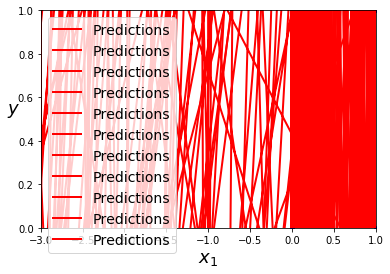

In [157]:
X_new_poly = poly_features.transform(X_test)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X_train, y_train, "b.")
plt.plot(X_test, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 1, 0, 1])
plt.show()